In [6]:
import requests
import pandas as pd

# Step 1: 请求 TfL 的 BikePoint 实时数据
url = "https://api.tfl.gov.uk/BikePoint"
response = requests.get(url)
stations = response.json()

# Step 2: 解析关键字段
records = []
for station in stations:
    station_id = station["id"]
    name = station["commonName"]
    lat = station["lat"]
    lon = station["lon"]
    
    # 将 additionalProperties 中的键值对转换成字典
    props = {item["key"]: item["value"] for item in station["additionalProperties"]}
    
    records.append({
        "id": station_id,
        "name": name,
        "latitude": lat,
        "longitude": lon,
        "nbBikes": int(props.get("NbBikes", 0)),
        "nbEmptyDocks": int(props.get("NbEmptyDocks", 0)),
        "nbDocks": int(props.get("NbDocks", 0)),
        "lastUpdate": props.get("LastUpdate")
    })

# Step 3: 保存为 DataFrame 或导出
df = pd.DataFrame(records)
df.to_csv("bikepoint_realtime.csv", index=False)
df.head()


,id,name,latitude,longitude,nbBikes,nbEmptyDocks,nbDocks,lastUpdate
0,BikePoints_1,"River Street , Clerkenwell",51.529163,-0.109970,1,18,19,None
1,BikePoints_2,"Phillimore Gardens, Kensington",51.499606,-0.197574,27,7,37,None
2,BikePoints_3,"Christopher Street, Liverpool Street",51.521283,-0.084605,2,30,32,None
3,BikePoints_4,"St. Chad's Street, King's Cross",51.530059,-0.120973,13,10,23,None
4,BikePoints_5,"Sedding Street, Sloane Square",51.493130,-0.156876,16,10,27,None


In [2]:
import requests
import pandas as pd

# Step 1: 请求 TfL 的 BikePoint 实时数据
url = "https://api.tfl.gov.uk/BikePoint"
response = requests.get(url)
stations = response.json()

# Step 2: 解析站点数据
records = []
for station in stations:
    station_id = station["id"]
    name = station["commonName"]
    lat = station["lat"]
    lon = station["lon"]
    props = {item["key"]: item["value"] for item in station["additionalProperties"]}
    records.append({
        "id": station_id,
        "name": name,
        "latitude": lat,
        "longitude": lon,
        "nbBikes": int(props.get("NbBikes", 0)),
        "nbEmptyDocks": int(props.get("NbEmptyDocks", 0)),
        "nbDocks": int(props.get("NbDocks", 0)),
        "lastUpdate": props.get("LastUpdate")
    })

df = pd.DataFrame(records)


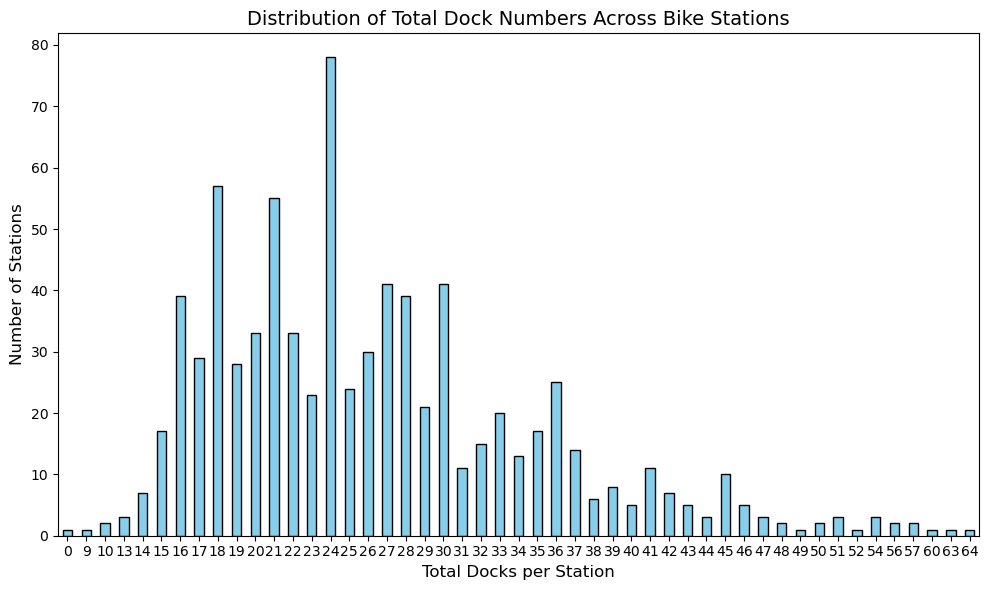

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# 请求 TfL 的 BikePoint 实时数据
url = "https://api.tfl.gov.uk/BikePoint"
response = requests.get(url)
stations = response.json()

# 解析所需字段
records = []
for station in stations:
    props = {item["key"]: item["value"] for item in station["additionalProperties"]}
    records.append({
        "id": station["id"],
        "name": station["commonName"],
        "latitude": station["lat"],
        "longitude": station["lon"],
        "nbBikes": int(props.get("NbBikes", 0)),
        "nbEmptyDocks": int(props.get("NbEmptyDocks", 0)),
        "nbDocks": int(props.get("NbDocks", 0)),
        "lastUpdate": props.get("LastUpdate")
    })

# 转为 DataFrame
df = pd.DataFrame(records)

# 统计不同 nbDocks 出现的次数
dock_counts = df["nbDocks"].value_counts().sort_index()

# 绘制直方图
plt.figure(figsize=(10, 6))
dock_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# 图表标签
plt.xlabel("Total Docks per Station", fontsize=12)
plt.ylabel("Number of Stations", fontsize=12)
plt.title("Distribution of Total Dock Numbers Across Bike Stations", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


###聚类分析部分

In [15]:
import requests

url = "https://api.tfl.gov.uk/BikePoint"
response = requests.get(url)
stations = response.json()

print(f"✅ 站点总数: {len(stations)}")
print(stations[0])  # 打印第一个站点的结构


✅ 站点总数: 800
{'$type': 'Tfl.Api.Presentation.Entities.Place, Tfl.Api.Presentation.Entities', 'id': 'BikePoints_1', 'url': '/Place/BikePoints_1', 'commonName': 'River Street , Clerkenwell', 'placeType': 'BikePoint', 'additionalProperties': [{'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities', 'category': 'Description', 'key': 'TerminalName', 'sourceSystemKey': 'BikePoints', 'value': '001023', 'modified': '2025-08-02T16:11:45.197Z'}, {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities', 'category': 'Description', 'key': 'Installed', 'sourceSystemKey': 'BikePoints', 'value': 'true', 'modified': '2025-08-02T16:11:45.197Z'}, {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperties, Tfl.Api.Presentation.Entities', 'category': 'Description', 'key': 'Locked', 'sourceSystemKey': 'BikePoints', 'value': 'false', 'modified': '2025-08-02T16:11:45.197Z'}, {'$type': 'Tfl.Api.Presentation.Entities.AdditionalProperti

In [24]:
for i, station in enumerate(stations[:5]):
    print(f"站点 {i+1}:")
    print(f"  name       : {station.get('commonName')}")
    print(f"  id         : {station.get('id')}")
    print(f"  lat, lon   : {station.get('lat')}, {station.get('lon')}")
    print("-" * 40)


站点 1:
  name       : River Street , Clerkenwell
  id         : BikePoints_1
  lat, lon   : 51.529163, -0.10997
----------------------------------------
站点 2:
  name       : Phillimore Gardens, Kensington
  id         : BikePoints_2
  lat, lon   : 51.499606, -0.197574
----------------------------------------
站点 3:
  name       : Christopher Street, Liverpool Street
  id         : BikePoints_3
  lat, lon   : 51.521283, -0.084605
----------------------------------------
站点 4:
  name       : St. Chad's Street, King's Cross
  id         : BikePoints_4
  lat, lon   : 51.530059, -0.120973
----------------------------------------
站点 5:
  name       : Sedding Street, Sloane Square
  id         : BikePoints_5
  lat, lon   : 51.49313, -0.156876
----------------------------------------


In [25]:
# 遍历所有站点并提取真实 station_id
for station in stations:
    # 提取 additionalProperties 字典
    props = {item["key"]: item["value"] for item in station["additionalProperties"]}
    
    # 尝试获取真实 ID（如 '00108'）
    station_id_str = props.get("StationId")
    
    # 只打印有效数字 ID
    if station_id_str and station_id_str.isdigit():
        # 转换为整数 ID，例如 '00108' -> 1108
        station_id = int(station_id_str) + 1000
        print(station_id)


In [16]:
import pandas as pd
import os
from glob import glob

# 设置文件夹路径
folder_path = "K-means——2024data"

# 获取所有 CSV 文件路径
csv_files = glob(os.path.join(folder_path, "*.csv"))

# 用于存放所有站点名
all_station_names = []

# 遍历每个 CSV 文件提取 startstation_name
for file in csv_files:
    try:
        df = pd.read_csv(file, usecols=["startstation_name"])
        all_station_names.extend(df["startstation_name"].dropna().unique())
    except Exception as e:
        print(f"读取文件 {file} 时出错：{e}")

# 去重并排序
unique_station_names = sorted(set(all_station_names))

# 打印总数和前若干示例
print(f"\n✅ 总共唯一 startstation_name 数量：{len(unique_station_names)}")
print("📌 示例前 50 个：")
for name in unique_station_names[:50]:
    print("-", name)



✅ 总共唯一 startstation_name 数量：815
📌 示例前 50 个：
- Abbey Orchard Street, Westminster
- Abbey Orchard Street, Westminster_OLD
- Abbotsbury Road, Holland Park
- Aberdeen Place, St. John's Wood
- Aberfeldy Street, Poplar
- Abingdon Green, Westminster
- Abingdon Villas, Kensington
- Ackroyd Drive, Bow
- Ada Street, Hackney Central
- Addison Road, Holland Park
- Aintree Street, Fulham
- Albany Street, The Regent's Park
- Albert Bridge Road, Battersea Park
- Albert Embankment, Vauxhall
- Albert Embankment, Vauxhall_OLD
- Albert Gardens, Stepney
- Albert Gate, Hyde Park
- Albert Square, Stockwell
- Albert Street, Camden Town
- Alderney Street, Pimlico
- Aldersgate Street, Barbican
- Alfreda Street, Battersea Park
- All Saints Church, Portobello
- All Saints' Road, Portobello
- Allington Street, Victoria
- Alma Road, Wandsworth
- Alpha Grove, Millwall
- Ampton Street , Clerkenwell
- Ansell House, Stepney
- Antill Road, Mile End
- Archbishop's Park, Waterloo
- Argyle Street, Kings Cross
- Argyll Ro

In [17]:
import pandas as pd
import os
from glob import glob

# 设置文件夹路径
folder_path = "K-means——2024data"

# 获取所有 CSV 文件路径
csv_files = glob(os.path.join(folder_path, "*.csv"))

# 用于保存所有站点名
all_station_names = []

# 遍历每个 CSV 文件提取 startstation_name
for file in csv_files:
    try:
        df = pd.read_csv(file, usecols=["startstation_name"])
        all_station_names.extend(df["startstation_name"].dropna().unique())
    except Exception as e:
        print(f"读取文件 {file} 时出错: {e}")

# 去重并排序
unique_station_names = sorted(set(all_station_names))

# 保存为 CSV 文件
output_df = pd.DataFrame(unique_station_names, columns=["startstation_name"])
output_df.to_csv("unique_startstation_names.csv", index=False, encoding="utf-8-sig")

print(f"✅ 共提取出 {len(unique_station_names)} 个唯一站点名，已保存至 'unique_startstation_names.csv'")


✅ 共提取出 815 个唯一站点名，已保存至 'unique_startstation_names.csv'


In [18]:
import pandas as pd
import os
from glob import glob

# 路径设置
folder_path = "K-means——2024data"
all_files = glob(os.path.join(folder_path, "*.csv"))

# 读取所有数据文件
df_list = []
for file in all_files:
    df = pd.read_csv(file, usecols=["startstation_id", "startstation_name"])
    df_list.append(df)

# 合并全年所有数据
combined_df = pd.concat(df_list, ignore_index=True)

# 按站点统计出行总次数
trip_counts = combined_df.groupby(["startstation_name"]).size().reset_index(name="total_trips")

# 使用固定值 366 计算平均每日出行次数
trip_counts["avg_daily_trips"] = trip_counts["total_trips"] / 366

# 保存结果
trip_counts.to_csv("avg_daily_trips_by_station.csv", index=False)

# 展示前几行
print(trip_counts.head(50))


                        startstation_name  total_trips  avg_daily_trips
0       Abbey Orchard Street, Westminster         6763        18.478142
1   Abbey Orchard Street, Westminster_OLD         3856        10.535519
2           Abbotsbury Road, Holland Park         3907        10.674863
3         Aberdeen Place, St. John's Wood         7476        20.426230
4                Aberfeldy Street, Poplar         3514         9.601093
5             Abingdon Green, Westminster        11877        32.450820
6             Abingdon Villas, Kensington         6739        18.412568
7                      Ackroyd Drive, Bow        13406        36.628415
8             Ada Street, Hackney Central         9702        26.508197
9              Addison Road, Holland Park         5205        14.221311
10                 Aintree Street, Fulham        10286        28.103825
11       Albany Street, The Regent's Park        12088        33.027322
12     Albert Bridge Road, Battersea Park        12156        33

In [19]:
import pandas as pd
import os
from glob import glob

# 设置文件夹路径
folder_path = "K-means——2024data"
all_files = glob(os.path.join(folder_path, "*.csv"))

# 读取所有数据（包含出发时间）
df_list = []
for file in all_files:
    df = pd.read_csv(file, usecols=["startstation_name", "start_date"])
    df_list.append(df)

# 合并所有数据
combined_df = pd.concat(df_list, ignore_index=True)

# 将 start_date 转为 datetime 类型
combined_df["start_date"] = pd.to_datetime(combined_df["start_date"], dayfirst=True, errors="coerce")

# 过滤无法解析的时间
combined_df = combined_df.dropna(subset=["start_date"])

# 提取小时
combined_df["hour"] = combined_df["start_date"].dt.hour

# 标记是否为高峰时间（早7–10点 或 晚4–7点）
combined_df["is_peak"] = combined_df["hour"].isin([7, 8, 9, 16, 17, 18])

# 每个站点总出行数
total_by_station = combined_df.groupby("startstation_name").size().rename("total_trips")

# 每个站点高峰出行数
peak_by_station = combined_df[combined_df["is_peak"]].groupby("startstation_name").size().rename("peak_trips")

# 合并计算高峰占比
peak_ratio_df = pd.concat([total_by_station, peak_by_station], axis=1).fillna(0)
peak_ratio_df["peak_hour_departure_ratio"] = peak_ratio_df["peak_trips"] / peak_ratio_df["total_trips"]

# 重置索引并保留所需列
peak_ratio_df = peak_ratio_df.reset_index()[["startstation_name", "peak_hour_departure_ratio"]]

# 合并到你原先的 trip_counts 表中（注意文件名一致）
trip_counts = pd.read_csv("avg_daily_trips_by_station.csv")
trip_counts = trip_counts.merge(peak_ratio_df, on="startstation_name", how="left")

# 保存结果
trip_counts.to_csv("trip_indicators_with_peak_ratio.csv", index=False)


/tmp/ipykernel_165/1234692629.py:19: UserWarning: Parsing dates in %Y-%m-%d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  combined_df["start_date"] = pd.to_datetime(combined_df["start_date"], dayfirst=True, errors="coerce")


In [20]:
import pandas as pd

# 读取两个数据表
df_realtime = pd.read_csv("bikepoint_realtime.csv")
df_2024 = pd.read_csv("unique_startstation_names.csv")

# 去除空值并提取唯一站点名称
realtime_names = set(df_realtime["name"].dropna().unique())
names_2024 = set(df_2024["startstation_name"].dropna().unique())

# 精确匹配项
matched_names = realtime_names & names_2024

# 仅存在于实时数据中
realtime_only = realtime_names - names_2024

# 仅存在于2024中
names_2024_only = names_2024 - realtime_names

# 构建结果
matched = [{
    "realtime_station_name": name,
    "matched_2024_station_name": name,
    "match_type": "matched"
} for name in sorted(matched_names)]

realtime_unmatched = [{
    "realtime_station_name": name,
    "matched_2024_station_name": None,
    "match_type": "realtime_only"
} for name in sorted(realtime_only)]

names_2024_unmatched = [{
    "realtime_station_name": None,
    "matched_2024_station_name": name,
    "match_type": "2024_only"
} for name in sorted(names_2024_only)]

# 合并所有结果
combined_df = pd.DataFrame(matched + realtime_unmatched + names_2024_unmatched)

# 保存结果
combined_df.to_csv("station_name_exact_match_all.csv", index=False)

# 可选：预览前几行
print(combined_df.head(10))


               realtime_station_name          matched_2024_station_name  \
0  Abbey Orchard Street, Westminster  Abbey Orchard Street, Westminster   
1      Abbotsbury Road, Holland Park      Abbotsbury Road, Holland Park   
2    Aberdeen Place, St. John's Wood    Aberdeen Place, St. John's Wood   
3           Aberfeldy Street, Poplar           Aberfeldy Street, Poplar   
4        Abingdon Green, Westminster        Abingdon Green, Westminster   
5        Abingdon Villas, Kensington        Abingdon Villas, Kensington   
6                 Ackroyd Drive, Bow                 Ackroyd Drive, Bow   
7        Ada Street, Hackney Central        Ada Street, Hackney Central   
8         Addison Road, Holland Park         Addison Road, Holland Park   
9             Aintree Street, Fulham             Aintree Street, Fulham   

  match_type  
0    matched  
1    matched  
2    matched  
3    matched  
4    matched  
5    matched  
6    matched  
7    matched  
8    matched  
9    matched  


In [21]:
import pandas as pd
import os
from glob import glob

# ===== 设置路径 =====
folder_path = "K-means——2024data"  # 替换为你的文件夹路径
all_files = glob(os.path.join(folder_path, "*.csv"))

# ===== 读取所有出行记录并拼接 =====
df_list = []
for file in all_files:
    df = pd.read_csv(file, usecols=["startstation_name", "start_date"])
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

# ===== 解析日期，提取周几 =====
combined_df["start_date"] = pd.to_datetime(combined_df["start_date"], dayfirst=True, errors="coerce")
combined_df = combined_df.dropna(subset=["start_date"])  # 删除无法识别时间的行


combined_df["weekday"] = combined_df["start_date"].dt.weekday  # 0=Mon, ..., 6=Sun

# ===== 标记是否为周末（Saturday=5, Sunday=6） =====
combined_df["is_weekend"] = combined_df["weekday"].isin([5, 6])

# ===== 计算每个站点总出行次数与周末出行次数 =====
total_counts = combined_df.groupby("startstation_name").size()
weekend_counts = combined_df[combined_df["is_weekend"]].groupby("startstation_name").size()

# ===== 计算 weekend_usage_ratio =====
weekend_ratio = (weekend_counts / total_counts).fillna(0).reset_index()
weekend_ratio.columns = ["startstation_name", "weekend_usage_ratio"]

# ===== 保存为单独文件（可选） =====
weekend_ratio.to_csv("weekend_usage_ratio_by_station.csv", index=False)

# ===== 合并进已有指标文件 =====
df_indicators = pd.read_csv("trip_indicators_with_peak_ratio.csv")

df_merged = pd.merge(
    df_indicators,
    weekend_ratio,
    on="startstation_name",
    how="left"  # 若某些站点在全年数据中未出现则保留原始数据
)

# ===== 保存合并后的新文件 =====
df_merged.to_csv("trip_indicators_with_peak_and_weekend.csv", index=False)

# ===== 可选：显示前几行确认 =====
print(df_merged.head())


/tmp/ipykernel_165/1769084491.py:18: UserWarning: Parsing dates in %Y-%m-%d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  combined_df["start_date"] = pd.to_datetime(combined_df["start_date"], dayfirst=True, errors="coerce")


                       startstation_name  total_trips  avg_daily_trips  \
0      Abbey Orchard Street, Westminster         6763        18.478142   
1  Abbey Orchard Street, Westminster_OLD         3856        10.535519   
2          Abbotsbury Road, Holland Park         3907        10.674863   
3        Aberdeen Place, St. John's Wood         7476        20.426230   
4               Aberfeldy Street, Poplar         3514         9.601093   

   peak_hour_departure_ratio  weekend_usage_ratio  
0                   0.540960             0.148141  
1                   0.544935             0.186955  
2                   0.395271             0.316017  
3                   0.452205             0.273323  
4                   0.567645             0.286328  


In [26]:
import pandas as pd

# 读取包含周转率等指标的主表格
turnover_df = pd.read_csv("trip_indicators_with_peak_and_weekend.csv")

# 读取站点信息表格（如 bikepoint_realtime.csv）
station_info_df = pd.read_csv("bikepoint_realtime.csv")

# 将站点信息表格的 name 字段重命名为 startstation_name 以便匹配
station_info_df = station_info_df.rename(columns={"name": "startstation_name"})

# 选取需要合并的列（你可以根据站点信息表格结构调整）
station_info_df = station_info_df[[
    "startstation_name", "id", "latitude", "longitude", "nbDocks"
]]

# 进行合并，保留所有指标表格中的站点，无法匹配则为 NaN
merged_df = pd.merge(
    turnover_df,
    station_info_df,
    on="startstation_name",
    how="left"
)

# 保存结果（可选）
merged_df.to_csv("trip_indicators_with_station_info.csv", index=False)

# 显示前几行确认
print(merged_df.head())


                       startstation_name  total_trips  avg_daily_trips  \
0      Abbey Orchard Street, Westminster         6763        18.478142   
1  Abbey Orchard Street, Westminster_OLD         3856        10.535519   
2          Abbotsbury Road, Holland Park         3907        10.674863   
3        Aberdeen Place, St. John's Wood         7476        20.426230   
4               Aberfeldy Street, Poplar         3514         9.601093   

   peak_hour_departure_ratio  weekend_usage_ratio              id   latitude  \
0                   0.540960             0.148141  BikePoints_864  51.498125   
1                   0.544935             0.186955             NaN        NaN   
2                   0.395271             0.316017  BikePoints_559  51.501391   
3                   0.452205             0.273323  BikePoints_394  51.524826   
4                   0.567645             0.286328  BikePoints_554  51.513548   

   longitude  nbDocks  
0  -0.132102     29.0  
1        NaN      NaN  
2 

In [27]:
import pandas as pd
import os
from glob import glob

# ==== 设置路径 ====
folder_path = "K-means——2024data"
all_files = glob(os.path.join(folder_path, "*.csv"))

# ==== 读取出行数据 ====
df_list = []
for file in all_files:
    df = pd.read_csv(file, usecols=["startstation_name", "start_date"])
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

# ==== 时间解析 ====
combined_df["start_date"] = pd.to_datetime(combined_df["start_date"], dayfirst=True, errors="coerce")
combined_df["date"] = combined_df["start_date"].dt.date
combined_df["hour"] = combined_df["start_date"].dt.hour
combined_df["weekday"] = combined_df["start_date"].dt.weekday  # Monday=0, Sunday=6

# ==== 筛选工作日早高峰（07:00–10:00） ====
peak_df = combined_df[
    (combined_df["weekday"] < 5) & (combined_df["hour"] >= 7) & (combined_df["hour"] < 10)
]

# ==== 所有工作日（2024全年） ====
all_workdays = pd.date_range("2024-01-01", "2024-12-31", freq="B").date
total_workdays = len(all_workdays)  # 应为 261 天

# ==== 每站在早高峰有使用记录的天数 ====
peak_active_days = peak_df.groupby("startstation_name")["date"].nunique().reset_index()
peak_active_days.columns = ["startstation_name", "peak_active_days"]

# ==== 计算 early_peak_zero_days_ratio ====
peak_active_days["early_peak_zero_days_ratio"] = (
    (total_workdays - peak_active_days["peak_active_days"]) / total_workdays
)

# ==== 读取上一轮指标表格 ====
df_indicators = pd.read_csv("trip_indicators_with_station_info.csv")

# ==== 合并指标 ====
df_merged = pd.merge(
    df_indicators,
    peak_active_days[["startstation_name", "early_peak_zero_days_ratio"]],
    on="startstation_name",
    how="left"
)

# ==== 保存为新文件 ====
df_merged.to_csv("trip_indicators_with_peakgap.csv", index=False)

# ==== 可选：展示前几行 ====
print(df_merged.head())


/tmp/ipykernel_165/2778463447.py:18: UserWarning: Parsing dates in %Y-%m-%d %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  combined_df["start_date"] = pd.to_datetime(combined_df["start_date"], dayfirst=True, errors="coerce")


                       startstation_name  total_trips  avg_daily_trips  \
0      Abbey Orchard Street, Westminster         6763        18.478142   
1  Abbey Orchard Street, Westminster_OLD         3856        10.535519   
2          Abbotsbury Road, Holland Park         3907        10.674863   
3        Aberdeen Place, St. John's Wood         7476        20.426230   
4               Aberfeldy Street, Poplar         3514         9.601093   

   peak_hour_departure_ratio  weekend_usage_ratio              id   latitude  \
0                   0.540960             0.148141  BikePoints_864  51.498125   
1                   0.544935             0.186955             NaN        NaN   
2                   0.395271             0.316017  BikePoints_559  51.501391   
3                   0.452205             0.273323  BikePoints_394  51.524826   
4                   0.567645             0.286328  BikePoints_554  51.513548   

   longitude  nbDocks  early_peak_zero_days_ratio  
0  -0.132102     29.0 

In [28]:
import pandas as pd
import numpy as np

# ==== 读取主指标表格 ====
df = pd.read_csv("trip_indicators_with_peakgap.csv")

# ==== 获取坐标数组 ====
coords = df[["latitude", "longitude"]].to_numpy()

# ==== Haversine 矢量化距离函数 ====
def haversine_array(lat1, lon1, lat2, lon2):
    R = 6371000  # 地球半径（米）
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = phi2 - phi1
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2
    return 2 * R * np.arcsin(np.sqrt(a))

# ==== 计算每个站点 500m 半径内其他站点数量 ====
density_list = []
for i in range(len(df)):
    lat1, lon1 = coords[i]
    lat2, lon2 = coords[:, 0], coords[:, 1]
    dists = haversine_array(lat1, lon1, lat2, lon2)
    count = np.sum((dists <= 500) & (dists > 0))  # 自身不计入
    density_list.append(count)

# ==== 加入结果列 ====
df["spatial_density_index"] = density_list

# ==== 保存为新表格 ====
df.to_csv("trip_indicators_final.csv", index=False)

# ==== 可选：查看结果 ====
print(df[["startstation_name", "spatial_density_index"]].head())


                       startstation_name  spatial_density_index
0      Abbey Orchard Street, Westminster                     10
1  Abbey Orchard Street, Westminster_OLD                      0
2          Abbotsbury Road, Holland Park                      5
3        Aberdeen Place, St. John's Wood                      5
4               Aberfeldy Street, Poplar                      0


In [29]:
import pandas as pd

# ==== 读取完整指标文件 ====
df = pd.read_csv("trip_indicators_final.csv")

# ==== 删除缺失经纬度的行 ====
df_cleaned = df.dropna(subset=["latitude", "longitude"])

# ==== 保存为新文件 ====
df_cleaned.to_csv("data_collection.csv", index=False)

# ==== 可选：输出剩余站点数和前几行 ====
print(f"保留的站点数：{len(df_cleaned)}")
print(df_cleaned.head())


保留的站点数：795
                   startstation_name  total_trips  avg_daily_trips  \
0  Abbey Orchard Street, Westminster         6763        18.478142   
2      Abbotsbury Road, Holland Park         3907        10.674863   
3    Aberdeen Place, St. John's Wood         7476        20.426230   
4           Aberfeldy Street, Poplar         3514         9.601093   
5        Abingdon Green, Westminster        11877        32.450820   

   peak_hour_departure_ratio  weekend_usage_ratio              id   latitude  \
0                   0.540960             0.148141  BikePoints_864  51.498125   
2                   0.395271             0.316017  BikePoints_559  51.501391   
3                   0.452205             0.273323  BikePoints_394  51.524826   
4                   0.567645             0.286328  BikePoints_554  51.513548   
5                   0.470347             0.227129  BikePoints_583  51.497640   

   longitude  nbDocks  early_peak_zero_days_ratio  spatial_density_index  
0  -0.132102

In [33]:
import pandas as pd

# 读取数据
df = pd.read_csv("data_collection.csv")

# 计算周转率（防止除以0，填入None或0）
df["turnover_rate"] = df["avg_daily_trips"] / df["nbDocks"].replace(0, pd.NA)

# 保存新文件（可选）
df.to_csv("data_collection.csv", index=False)


In [37]:
import pandas as pd

# 读取数据
df = pd.read_csv("data_collection.csv")

# 选取聚类分析用的6个变量
features = [
    'avg_daily_trips',
    'peak_hour_departure_ratio',
    'weekend_usage_ratio',
    'turnover_rate',
    'early_peak_zero_days_ratio',
    'spatial_density_index'
]

# 输出包含缺失值的行（任一变量缺失即显示）
missing_rows = df[df[features].isna().any(axis=1)]

# 显示结果
print("包含缺失值的站点数量：", missing_rows.shape[0])
missing_rows


包含缺失值的站点数量： 1


,startstation_name,total_trips,avg_daily_trips,peak_hour_departure_ratio,weekend_usage_ratio,id,latitude,longitude,nbDocks,early_peak_zero_days_ratio,spatial_density_index,turnover_rate
215,"Eaton Square, Belgravia",6,0.016393,0.0,0.0,BikePoints_124,51.496544,-0.150905,18.0,NaN,3,0.000911


对于站点Eaton Square, Belgravia，其总出行为 6，日均 ≈ 0.016，代表“供过于求”类站点
出行频率极低（total_trips=6，avg_daily_trips≈0.016）

周末使用占比为 0，早高峰无出发，且泊位数不低（18 个）

说明该站点可能选址不当或需求严重不足，是典型“供过于求”的例子。

2. 政策干预优先对象
适合作为分析“应否撤站”或“资源再分配”的候选对象

可能代表系统中被忽视或服务失败的角落几乎无通勤功能，所以可合理推测其工作日没有早高峰出行，填为1并不过分

In [38]:
import pandas as pd

# 读取原始数据
df = pd.read_csv("data_collection.csv")

# 需要填充缺失值的列（聚类用指标）
features = [
    'avg_daily_trips', 
    'peak_hour_departure_ratio', 
    'weekend_usage_ratio',
    'turnover_rate', 
    'early_peak_zero_days_ratio', 
    'spatial_density_index'
]

# 用 1 填充缺失值
df[features] = df[features].fillna(1)

# 保存填充后的数据
df.to_csv("data_collection_filled.csv", index=False)


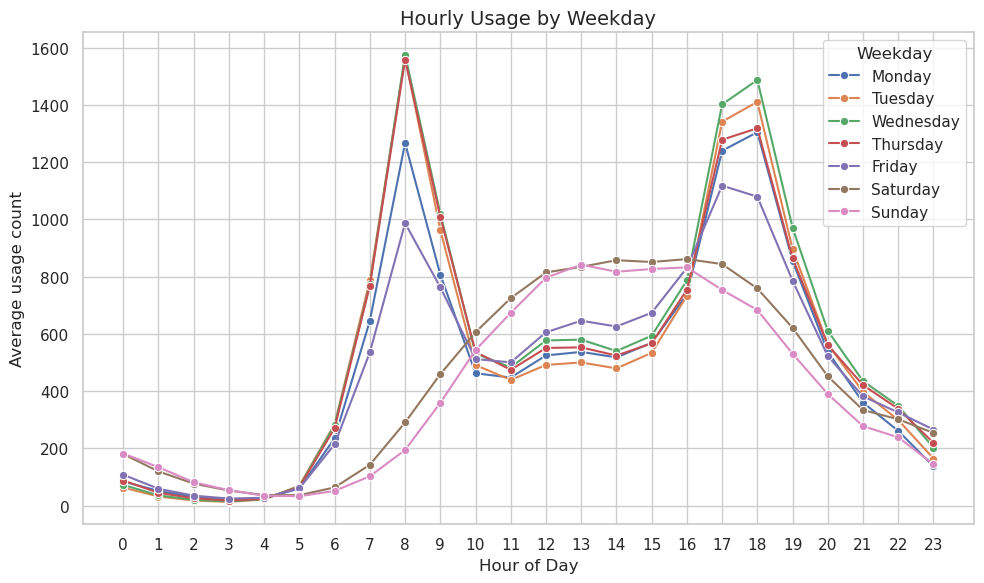

In [54]:
!pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('0_randon_forest/0-cluster_hourly_usage_2024.csv')

# 创建总使用量字段
df['total_usage'] = df['in_count'] + df['out_count']

# 将 weekday 映射为实际名称，0=Monday, ..., 6=Sunday
weekday_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['weekday'] = df['day_of_week'].map(weekday_map)

# 分组聚合：计算每小时的平均骑行量（按 weekday 分类）
grouped = df.groupby(['weekday', 'hour_of_day'])['total_usage'].mean().reset_index()

# 确保 weekday 顺序一致
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped['weekday'] = pd.Categorical(grouped['weekday'], categories=weekday_order, ordered=True)

# 设置绘图样式
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='hour_of_day', y='total_usage', hue='weekday', marker='o')

# 美化图表
plt.title('Hourly Usage by Weekday', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average usage count', fontsize=12)
plt.legend(title='Weekday')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_8597/3953112612.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['season', 'hour_of_day'])['total_usage'].mean().reset_index()


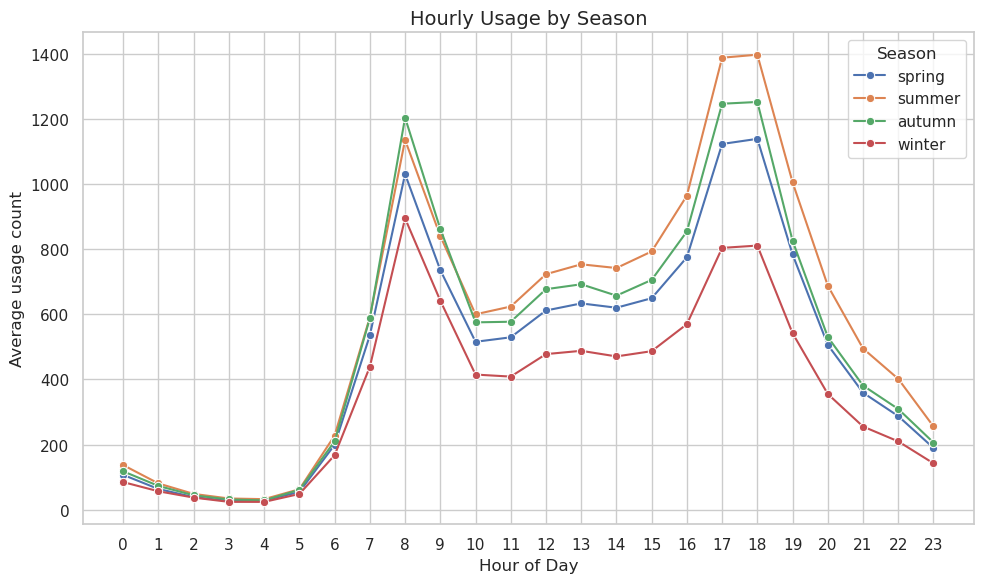

In [55]:

# 确保季节为分类变量并设置顺序（可选）
season_order = ['spring', 'summer', 'autumn', 'winter']
df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)

# 分组聚合：计算每小时的平均骑行量（按 season 分类）
grouped = df.groupby(['season', 'hour_of_day'])['total_usage'].mean().reset_index()

# 设置绘图样式
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='hour_of_day', y='total_usage', hue='season', marker='o')

# 美化图表
plt.title('Hourly Usage by Season', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average usage count', fontsize=12)
plt.legend(title='Season')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3.2.2 特征工程与分布校正

为满足聚类算法对数据分布的假设要求，我们对原始变量进行了以下转换处理：

1. **对数转换**：对具有右偏分布特征的变量（日均出行量、周转率、空间密度指数）应用自然对数加一变换：
   $$
   X_{\text{trans}} = \ln(1 + X_{\text{orig}})
   $$
   此转换有效缓解了极端值影响，使分布更接近对称（图3a-c）。

2. **比例变量处理**：对高峰小时出发比例和周末使用比例等[0,1]区间变量，保留原始数值。这些变量已接近对称分布（偏度<|0.5|），无需额外转换。

3. **零膨胀比例的特殊处理**：针对早高峰零出行天数比例这一零膨胀变量，我们采用分位数正态化方法：
   $$
   X_{\text{norm}} = \Phi^{-1}\left(\frac{\text{rank}(X)-0.5}{n}\right)
   $$
   其中 $\Phi^{-1}$ 为标准正态分布的反函数，$\text{rank}(X)$ 为数据点的排序位置，$n$ 为样本量。此方法将原始分布映射为标准正态分布（图3d），同时保持数据点的相对顺序不变，确保聚类结果可解释。

所有转换后的变量最后经过Z-score标准化处理：
$$
X_{\text{final}} = \frac{X_{\text{trans}} - \mu}{\sigma}
$$
使各特征均值为0，标准差为1，满足K-means聚类对特征尺度的要求。

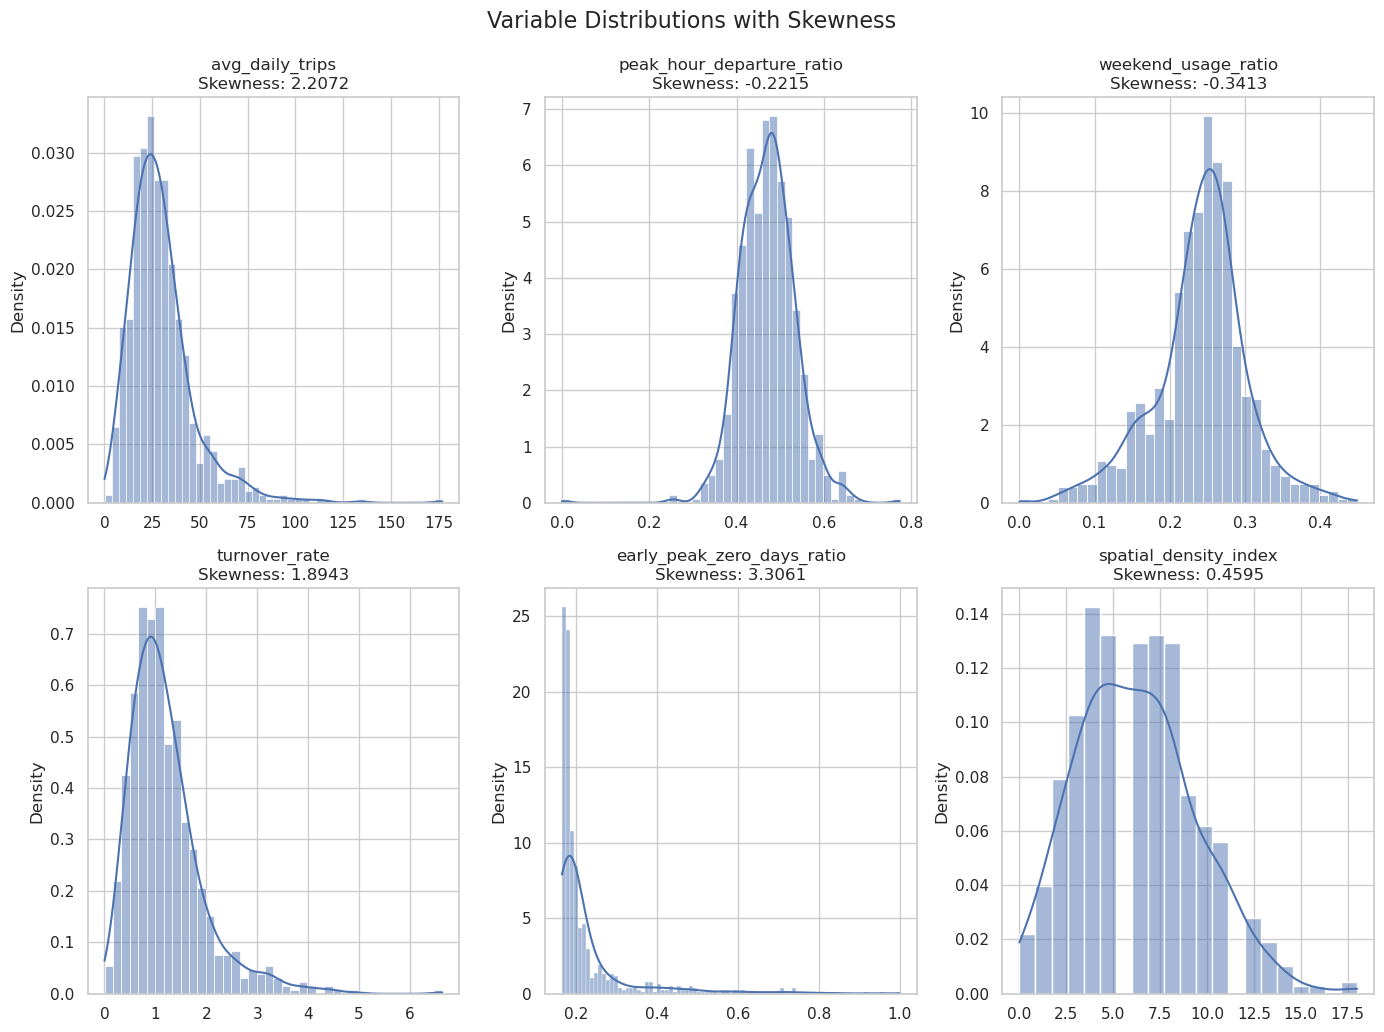

                               mean   median      std    skew  kurtosis  \
avg_daily_trips             29.7288  26.4617  17.5691  2.2072    9.8245   
peak_hour_departure_ratio    0.4707   0.4716   0.0633 -0.2215    4.3915   
weekend_usage_ratio          0.2405   0.2470   0.0608 -0.3413    1.1548   
turnover_rate                1.2062   1.0516   0.7469  1.8943    6.2549   
early_peak_zero_days_ratio   0.2293   0.1870   0.1173  3.3061   12.2685   
spatial_density_index        6.2189   6.0000   3.2187  0.4595    0.1141   

                            mean_median_diff  
avg_daily_trips                       3.2670  
peak_hour_departure_ratio            -0.0009  
weekend_usage_ratio                  -0.0065  
turnover_rate                         0.1546  
early_peak_zero_days_ratio            0.0422  
spatial_density_index                 0.2189  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # 用于计算偏度

# 读取数据
df = pd.read_csv("data_collection_filled.csv")

# 设置图像风格
sns.set(style="whitegrid")

# 需要分析的变量列表
features = [
    'avg_daily_trips',
    'peak_hour_departure_ratio',
    'weekend_usage_ratio',
    'turnover_rate',
    'early_peak_zero_days_ratio',
    'spatial_density_index'
]

# 方法1：直方图 + 密度曲线 + 偏度值
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    
    # 绘制分布直方图
    sns.histplot(df[feature], kde=True, stat='density')
    
    # 计算并显示偏度
    skewness = df[feature].skew()
    plt.title(f"{feature}\nSkewness: {skewness:.4f}", fontsize=12)
    plt.xlabel('')
    
plt.tight_layout()
plt.suptitle('Variable Distributions with Skewness', fontsize=16, y=1.03)
plt.show()

# 方法3：数值统计表
dist_stats = df[features].agg(['mean', 'median', 'std', 'skew', 'kurtosis']).T
dist_stats['mean_median_diff'] = dist_stats['mean'] - dist_stats['median']
print(dist_stats.round(4))


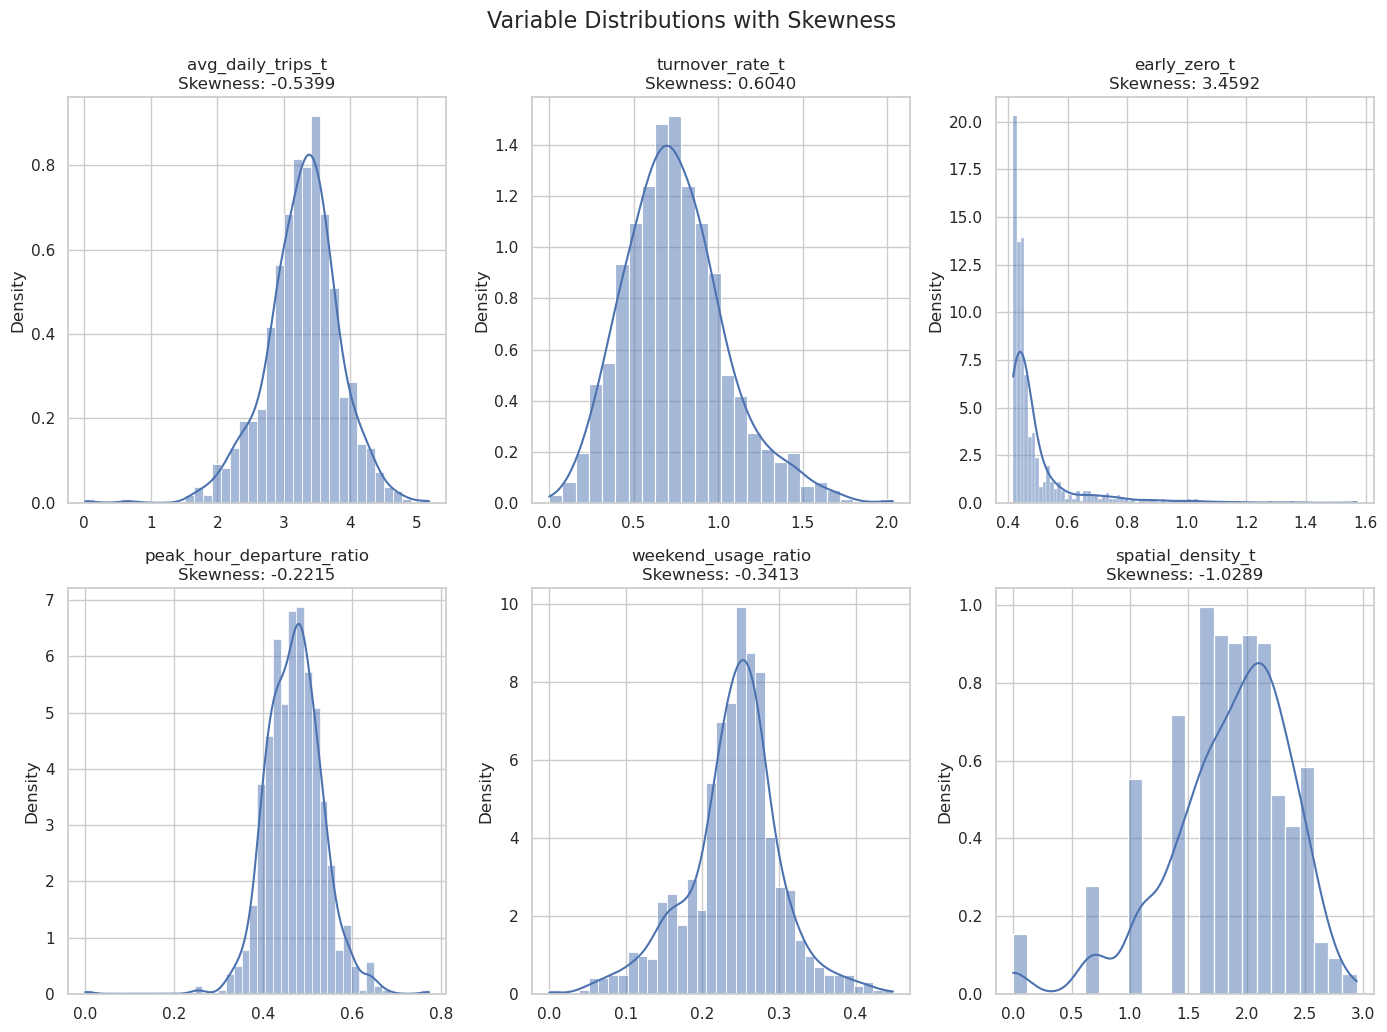

                               mean   median      std    skew  kurtosis  \
avg_daily_trips             29.7288  26.4617  17.5691  2.2072    9.8245   
peak_hour_departure_ratio    0.4707   0.4716   0.0633 -0.2215    4.3915   
weekend_usage_ratio          0.2405   0.2470   0.0608 -0.3413    1.1548   
turnover_rate                1.2062   1.0516   0.7469  1.8943    6.2549   
early_peak_zero_days_ratio   0.2293   0.1870   0.1173  3.3061   12.2685   
spatial_density_index        6.2189   6.0000   3.2187  0.4595    0.1141   

                            mean_median_diff  
avg_daily_trips                       3.2670  
peak_hour_departure_ratio            -0.0009  
weekend_usage_ratio                  -0.0065  
turnover_rate                         0.1546  
early_peak_zero_days_ratio            0.0422  
spatial_density_index                 0.2189  


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1) 变量级变换
df["avg_daily_trips_t"] = np.log1p(df["avg_daily_trips"])               # 或 Yeo-Johnson/Box-Cox
df["turnover_rate_t"]   = np.log1p(df["turnover_rate"])                 # 或 np.cbrt
df["early_zero_t"]      = np.arcsin(np.sqrt(np.clip(df["early_peak_zero_days_ratio"], 0, 1)))

# 可选：密度轻度右尾
df["spatial_density_t"] = np.log1p(df["spatial_density_index"])         # 或保留原值+RobustScaler

# 2) 选择入聚类的列（原来无需变换的就直接用原列）
features_for_kmeans = [
    "avg_daily_trips_t",
    "turnover_rate_t",
    "early_zero_t",
    "peak_hour_departure_ratio",
    "weekend_usage_ratio",
    "spatial_density_t"  # 若不做log1p，则用原列名并改成 RobustScaler
]
# 方法1：直方图 + 密度曲线 + 偏度值
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features_for_kmeans, 1):
    plt.subplot(2, 3, i)
    
    # 绘制分布直方图
    sns.histplot(df[feature], kde=True, stat='density')
    
    # 计算并显示偏度
    skewness = df[feature].skew()
    plt.title(f"{feature}\nSkewness: {skewness:.4f}", fontsize=12)
    plt.xlabel('')
    
plt.tight_layout()
plt.suptitle('Variable Distributions with Skewness', fontsize=16, y=1.03)
plt.show()
# 方法3：数值统计表
dist_stats = df[features].agg(['mean', 'median', 'std', 'skew', 'kurtosis']).T
dist_stats['mean_median_diff'] = dist_stats['mean'] - dist_stats['median']
print(dist_stats.round(4))


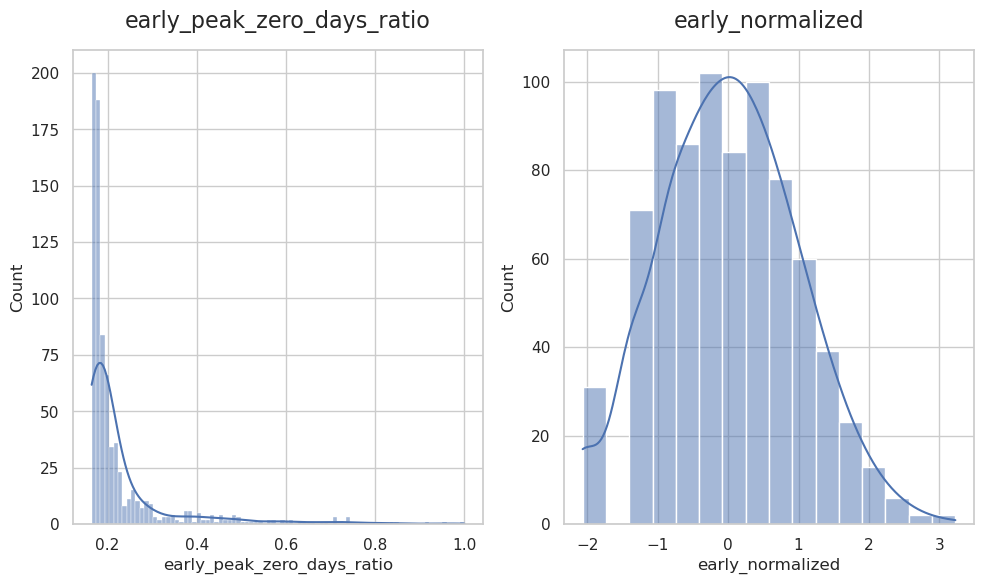

In [15]:
import numpy as np
from scipy.stats import norm, rankdata

def rank_normalization(x):
    """执行分位数正态化转换"""
    # 计算数据的排名（处理并列值）
    ranks = rankdata(x, method='average')
    
    # 将排名转换为均匀分布比例
    uniform = (ranks - 0.5) / len(x)
    
    # 映射到标准正态分布的分位数
    normal_quantiles = norm.ppf(uniform)
    
    return normal_quantiles

# 应用分位数正态化到early_peak_zero_days_ratio
df['early_normalized'] = rank_normalization(df['early_peak_zero_days_ratio'])

# 可视化转换效果
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['early_peak_zero_days_ratio'], kde=True)
plt.title('early_peak_zero_days_ratio', fontsize=16, y=1.03)

plt.subplot(1, 2, 2)
sns.histplot(df['early_normalized'], kde=True)
plt.title('early_normalized', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

In [18]:
# 检查转换后偏度
print("转换后偏度:", df['early_normalized'].skew())

# 检查转换后分布
print(df['early_normalized'].describe())
# 保存原始值用于解释
df['orig_early'] = df['early_peak_zero_days_ratio']

转换后偏度: 0.1017388621932476
count    795.000000
mean       0.006871
std        0.982432
min       -2.064253
25%       -0.878128
50%        0.041000
75%        0.663644
max        3.225424
Name: early_normalized, dtype: float64


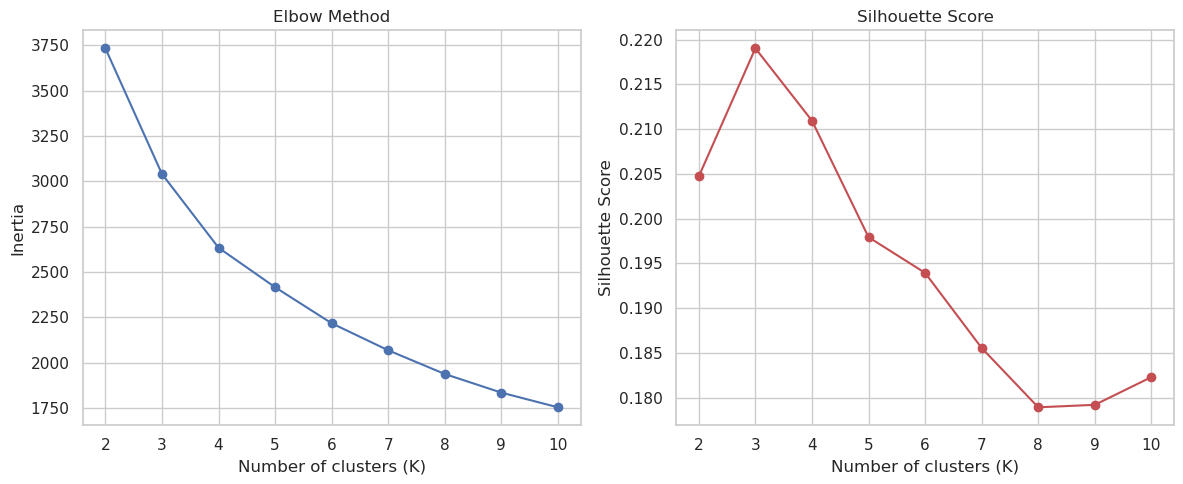

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) 选择特征（用你已经变换好的列名）
final_features = [
    "avg_daily_trips_t",
    "turnover_rate_t",
    "early_normalized",            # 你分位数正态化后的列名（如 early_zero_qt / early_normalized）
    "peak_hour_departure_ratio",
    "weekend_usage_ratio",
    "spatial_density_t"
]

# 可选：检查缺失
if df[final_features].isnull().any().any():
    print("Warning: NaN detected – you may want to fillna or dropna before scaling.")
    # df = df.dropna(subset=final_features)

# 2) 标准化（只做一次）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[final_features])

# 3) 选 K 并计算指标
k_range = list(range(2, 11))   # K=2..10
inertia = []
silhouette_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=25)  # n_init 稍大更稳
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    # silhouette 只在 k>=2 定义，这里 k 从 2 开始所以都可算
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# 4) 画图（确保 x 与 y 等长）
plt.figure(figsize=(12, 5))

# 肘部法
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)

# 轮廓系数
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')   # 关键：不要再切片 k_range[1:]
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(k_range)

plt.tight_layout()
plt.show()


In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# X_scaled 是你标准化后的矩阵（ndarray）
k_range = range(2, 11)
res = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    ch  = calinski_harabasz_score(X_scaled, labels)
    db  = davies_bouldin_score(X_scaled, labels)
    res.append([k, sil, ch, db])

metrics_df = pd.DataFrame(res, columns=["k","silhouette","CH","DB"])
print(metrics_df.round(3))

# —— 稳定性：子样本重复，计算 ARI —— #
def stability_score(X, k, repeats=20, sample=0.8, seed=0):
    rng = np.random.RandomState(seed)
    labs, idxs = [], []
    for r in range(repeats):
        idx = np.sort(rng.choice(len(X), int(len(X)*sample), replace=False))
        km  = KMeans(n_clusters=k, random_state=rng.randint(1e9), n_init=50)
        lab = np.full(len(X), -1)
        lab[idx] = km.fit_predict(X[idx])
        labs.append(lab); idxs.append(idx)
    scores=[]
    for i in range(repeats-1):
        for j in range(i+1, repeats):
            inter = np.intersect1d(idxs[i], idxs[j])
            if len(inter)>0:
                scores.append(adjusted_rand_score(labs[i][inter], labs[j][inter]))
    return np.mean(scores), np.std(scores)

stab = []
for k in k_range:
    m,s = stability_score(X_scaled, k)
    stab.append([k,m,s])
stab_df = pd.DataFrame(stab, columns=["k","ARI_mean","ARI_sd"])
print(stab_df.round(3))


    k  silhouette       CH     DB
0   2       0.205  220.166  1.706
1   3       0.218  225.208  1.420
2   4       0.211  213.754  1.426
3   5       0.198  192.342  1.359
4   6       0.196  181.806  1.330
5   7       0.180  171.511  1.335
6   8       0.179  164.252  1.336
7   9       0.179  157.069  1.351
8  10       0.182  149.876  1.377
    k  ARI_mean  ARI_sd
0   2     0.848   0.190
1   3     0.878   0.068
2   4     0.883   0.068
3   5     0.669   0.173
4   6     0.718   0.125
5   7     0.598   0.167
6   8     0.686   0.114
7   9     0.600   0.114
8  10     0.584   0.120


In [36]:
from sklearn.cluster import KMeans

# 设置聚类数为4
kmeans3 = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 可选：查看每个聚类的数量
print(df['cluster'].value_counts())

# save
df.to_csv("0_try2_data/kmeans3_cluster.csv", index=False)



cluster
0    366
1    253
2    176
Name: count, dtype: int64


In [40]:
import pandas as pd

# 读取含聚类结果的表格
df = pd.read_csv("0_try2_data/kmeans3_cluster.csv")

# 指定需要统计的特征列
features = [
    'avg_daily_trips',
    'peak_hour_departure_ratio',
    'weekend_usage_ratio',
    'turnover_rate',
    'early_peak_zero_days_ratio',
    'spatial_density_index'
]

# 按 cluster 分组计算均值，并添加每组数量
cluster_summary = df.groupby('cluster')[features].mean().round(3)
cluster_summary['num_stations'] = df['cluster'].value_counts().sort_index()
# 保存为新文件（可选）
cluster_summary.to_csv("0_try2_data/3cluster_summary_statistics.csv")


# 输出结果
import pandas as pd
from IPython.display import display
display(cluster_summary)


,avg_daily_trips,peak_hour_departure_ratio,weekend_usage_ratio,turnover_rate,early_peak_zero_days_ratio,spatial_density_index,num_stations
cluster,,,,,,,
0,37.987,0.458,0.261,1.572,0.182,5.380,366
1,15.796,0.453,0.266,0.611,0.273,5.170,253
2,32.584,0.522,0.161,1.302,0.265,9.472,176


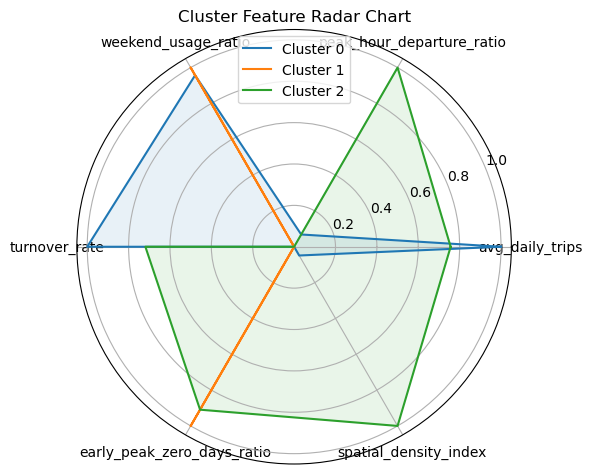

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# 读取聚类结果（含经纬度）
df = pd.read_csv("0_try2_data/kmeans3_cluster.csv")

# 1. 特征差异雷达图
features = [
    'avg_daily_trips', 'peak_hour_departure_ratio', 'weekend_usage_ratio',
    'turnover_rate', 'early_peak_zero_days_ratio', 'spatial_density_index'
]
cluster_means = df.groupby('cluster')[features].mean()

# 标准化特征以画雷达图
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), 
                              columns=features, index=cluster_means.index)

# 画雷达图
import numpy as np

labels = features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for i, row in cluster_scaled.iterrows():
    values = row.tolist() + row.tolist()[:1]
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Cluster Feature Radar Chart")
ax.legend()
plt.tight_layout()
plt.savefig("0_try2_data/Cluster Feature Radar Chart.png", dpi=300, bbox_inches="tight")
plt.show()

/tmp/ipykernel_8597/135274592.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Spectral', k)


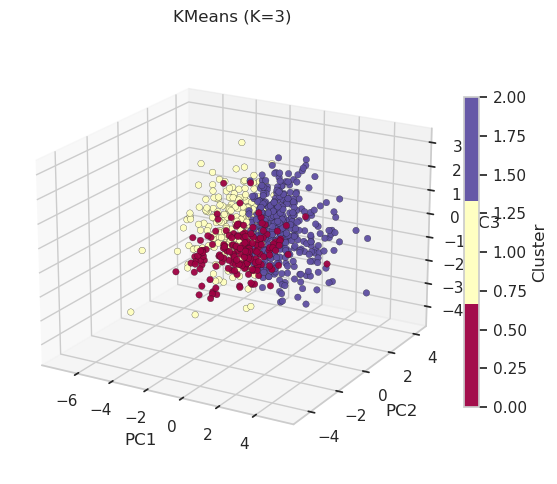

/tmp/ipykernel_8597/135274592.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Spectral', k)


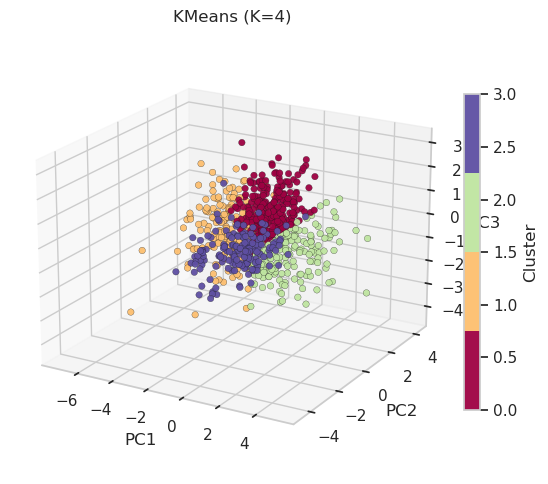

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# 1) PCA 降到 3 维（仅用于可视化）
pca = PCA(n_components=3, random_state=42)
X3 = pca.fit_transform(X_scaled)

def plot_3d(X3, labels, k, title, save_path=None, elev=20, azim=-60):
    fig = plt.figure(figsize=(6.2, 5))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.cm.get_cmap('Spectral', k)
    sc = ax.scatter(X3[:,0], X3[:,1], X3[:,2],
                    c=labels, cmap=cmap, s=22, alpha=0.95, edgecolor='k', linewidths=0.2)
    ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
    ax.view_init(elev=elev, azim=azim)
    cbar = fig.colorbar(sc, ax=ax, fraction=0.03, pad=0.02)
    cbar.set_label('Cluster')
    ax.set_title(title)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# 2) K=3
km3 = KMeans(n_clusters=3, random_state=42, n_init=50)
labels3 = km3.fit_predict(X_scaled)
df['cluster_k3'] = labels3
plot_3d(X3, labels3, 3, 'KMeans (K=3)', save_path='fig_3D_k3.png')

# 3) K=4
km4 = KMeans(n_clusters=4, random_state=42, n_init=50)
labels4 = km4.fit_predict(X_scaled)
df['cluster_k4'] = labels4
plot_3d(X3, labels4, 4, 'KMeans (K=4)', save_path='fig_3D_k4.png')


In [46]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42).fit(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_.round(3),
      "  (sum=", round(pca.explained_variance_ratio_.sum(), 3), ")")

loadings = pd.DataFrame(pca.components_, columns=final_features, index=['PC1','PC2','PC3']).T
print(loadings.round(3))


Explained variance ratio: [0.36  0.298 0.189]   (sum= 0.846 )
                             PC1    PC2    PC3
avg_daily_trips_t          0.637  0.078 -0.115
turnover_rate_t            0.600  0.078 -0.271
early_normalized          -0.433 -0.251 -0.456
peak_hour_departure_ratio  0.127 -0.445  0.665
weekend_usage_ratio       -0.133  0.671 -0.081
spatial_density_t          0.113 -0.526 -0.506


In [47]:
import numpy as np, pandas as pd
from sklearn.decomposition import PCA

# X_scaled：你用于聚类的标准化矩阵；final_features：对应的列名列表
pca = PCA(n_components=3, random_state=42).fit(X_scaled)

print("Explained variance ratio (PC1, PC2, PC3):",
      pca.explained_variance_ratio_.round(3),
      "  sum=", round(pca.explained_variance_ratio_.sum(), 3))

loadings = pd.DataFrame(pca.components_.T,
                        index=final_features,
                        columns=['PC1','PC2','PC3'])
print("\nLoadings (contribution of each feature to PCs):")
print(loadings.round(3))

# 按绝对值从大到小，看看每个PC主要由哪些变量构成
for pc in ['PC1','PC2','PC3']:
    print(f"\nTop contributors to {pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))


Explained variance ratio (PC1, PC2, PC3): [0.36  0.298 0.189]   sum= 0.846

Loadings (contribution of each feature to PCs):
                             PC1    PC2    PC3
avg_daily_trips_t          0.637  0.078 -0.115
turnover_rate_t            0.600  0.078 -0.271
early_normalized          -0.433 -0.251 -0.456
peak_hour_departure_ratio  0.127 -0.445  0.665
weekend_usage_ratio       -0.133  0.671 -0.081
spatial_density_t          0.113 -0.526 -0.506

Top contributors to PC1:
avg_daily_trips_t            0.636682
turnover_rate_t              0.600485
early_normalized             0.432932
weekend_usage_ratio          0.132923
peak_hour_departure_ratio    0.127336
Name: PC1, dtype: float64

Top contributors to PC2:
weekend_usage_ratio          0.670685
spatial_density_t            0.526038
peak_hour_departure_ratio    0.445323
early_normalized             0.250907
turnover_rate_t              0.078341
Name: PC2, dtype: float64

Top contributors to PC3:
peak_hour_departure_ratio    0.665407

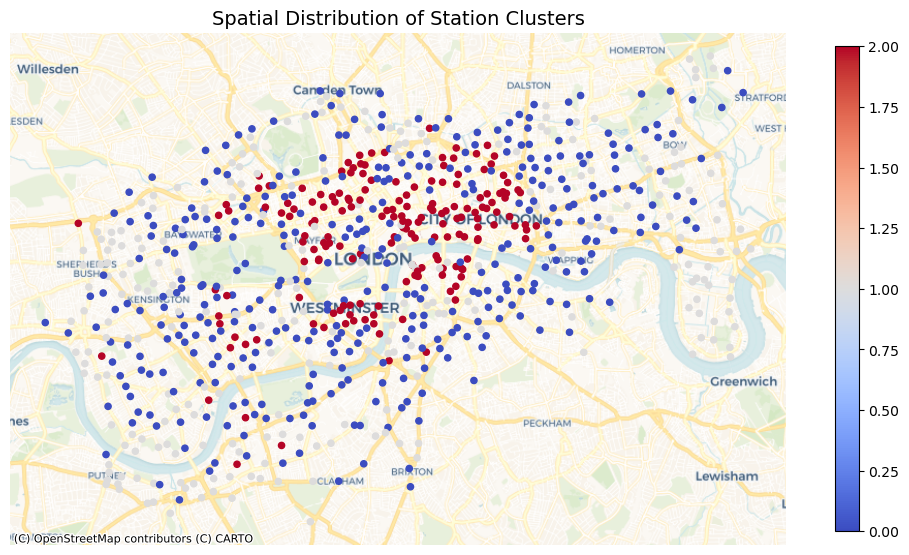

In [18]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point
# 读取数据
df = pd.read_csv("0_try2_data/kmeans3_cluster.csv")

# 构建 GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326").to_crs(epsg=3857)

# 绘图
fig, ax = plt.subplots(figsize=(10, 10))
plot = gdf.plot(
    ax=ax,
    column='cluster',
    cmap='coolwarm',
    legend=True,
    markersize=20,
    alpha=1,

    legend_kwds={'shrink': 0.5}  # 缩小色带为一半
)

# 添加深色底图：OpenStreetMap.HOT
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

# 样式设置
ax.set_axis_off()
ax.set_title("Spatial Distribution of Station Clusters", fontsize=14)
plt.tight_layout()
plt.savefig("0_try2_data/Spatial Distribution of Station Clusters.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
df.to_csv("0_try2_data/kmeans3_cluster.csv", index=False)

In [9]:
import geopandas as gpd

# 读取你刚上传的 GeoJSON
gdf = gpd.read_file("neighbourhoods (1).geojson")

# 看 CRS 和所有字段
print("CRS:", gdf.crs)
print("Columns:", list(gdf.columns))

# 看前几行
print(gdf.head())


CRS: EPSG:4326
Columns: ['neighbourhood', 'neighbourhood_group', 'geometry']
          neighbourhood neighbourhood_group  \
0  Kingston upon Thames                None   
1               Croydon                None   
2               Bromley                None   
3              Hounslow                None   
4                Ealing                None   

                                            geometry  
0  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...  
1  MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...  
2  MULTIPOLYGON (((0.01216 51.2996, 0.01199 51.29...  
3  MULTIPOLYGON (((-0.24454 51.4887, -0.24466 51....  
4  MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...  


In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1) 读入你现在的边界文件（已经是 EPSG:4326，并且有 borough 名称列 'neighbourhood'）
gdf_borough = gpd.read_file("neighbourhoods (1).geojson")  # ←替换你的路径
gdf_borough = gdf_borough[['neighbourhood','geometry']].rename(columns={'neighbourhood':'borough'})
print(gdf_borough.crs, gdf_borough.head(2))

# 2) 读入聚类结果（确保包含 station_id, longitude, latitude, cluster）
df_clusters = pd.read_csv("0_try2_data/cluster.csv")      # ←替换你的路径
# 如果列名不同，改成一致：
# df_clusters.rename(columns={'lon':'longitude','lat':'latitude'}, inplace=True)

# cluster 转为 int（0/1/2）
df_clusters['cluster'] = df_clusters['cluster'].astype(int)

# 3) 转为 GeoDataFrame（与边界同 CRS: EPSG:4326）
gdf_pts = gpd.GeoDataFrame(
    df_clusters,
    geometry=gpd.points_from_xy(df_clusters['longitude'], df_clusters['latitude']),
    crs="EPSG:4326"
)

# 4) 空间连接（点→区）
gdf_join = gpd.sjoin(
    gdf_pts[['id','cluster','geometry']],
    gdf_borough[['borough','geometry']],
    how='left',
    predicate='within'
)
print(gdf_join.head())
# 如担心个别点落界外，可：gdf_join = gdf_join.dropna(subset=['borough'])


EPSG:4326                 borough                                           geometry
0  Kingston upon Thames  MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...
1               Croydon  MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...
               id  cluster                   geometry  index_right  \
0  BikePoints_864        2   POINT (-0.1321 51.49812)         25.0   
1  BikePoints_559        1  POINT (-0.20599 51.50139)         23.0   
2  BikePoints_394        0  POINT (-0.17627 51.52483)         25.0   
3  BikePoints_554        1  POINT (-0.00566 51.51355)         27.0   
4  BikePoints_583        2  POINT (-0.12597 51.49764)         25.0   

                  borough  
0             Westminster  
1  Kensington and Chelsea  
2             Westminster  
3           Tower Hamlets  
4             Westminster  


In [14]:
# 数量：行为 borough，列为 cluster
counts = (
    gdf_join
    .groupby(['borough','cluster'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0:'c0', 1:'c1', 2:'c2'})
)

# 占比：
props = counts.div(counts.sum(axis=1), axis=0).fillna(0)

# 合并回边界
gdf_bor_stats = gdf_borough.merge(props, left_on='borough', right_index=True, how='left').fillna(0)

# 也保存一份表格（方便写论文表）
gdf_bor_stats[['borough','c0','c1','c2']].sort_values('c1', ascending=False).to_csv(
    "0_try2_data/borough_cluster_shares.csv", index=False
)
gdf_bor_stats.head()


,borough,geometry,c0,c1,c2
0,Kingston upon Thames,"MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...",0.0,0.0,0.0
1,Croydon,"MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...",0.0,0.0,0.0
2,Bromley,"MULTIPOLYGON (((0.01216 51.2996, 0.01199 51.29...",0.0,0.0,0.0
3,Hounslow,"MULTIPOLYGON (((-0.24454 51.4887, -0.24466 51....",0.0,0.0,0.0
4,Ealing,"MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...",0.0,0.0,0.0


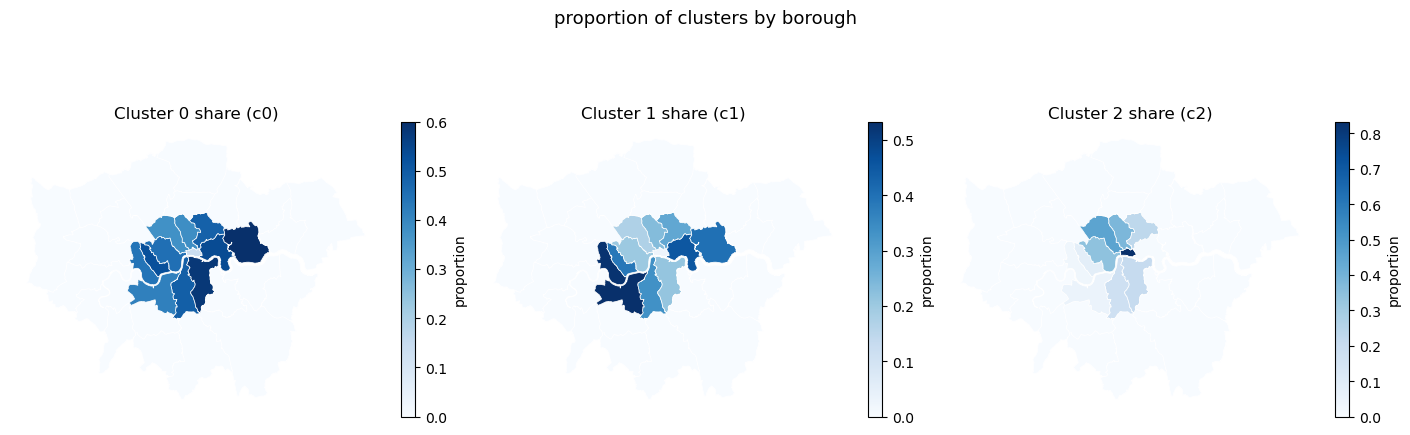

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
titles = ['Cluster 0 share (c0)', 'Cluster 1 share (c1)', 'Cluster 2 share (c2)']
cols   = ['c0', 'c1', 'c2']

for ax, col, title in zip(axes, cols, titles):
    gdf_bor_stats.plot(
        column=col, ax=ax, legend=True,
        cmap='Blues', edgecolor='white', linewidth=0.5,
        legend_kwds={'label':'proportion', 'shrink':0.6}
    )
    ax.set_title(title)
    ax.set_axis_off()

plt.suptitle("proportion of clusters by borough", y=1.02, fontsize=13)
# 保存





